# ANIME RECOMMENDATION ANALYSIS USING PYTHON

## OBJECTIVE

To develop a anime recommendation system that leverages user preferences, viewing history, and anime metadata (such as genres, ratings, and number of episodes) to suggest personalized anime content. The analysis aims to identify patterns in user behavior and anime characteristics to enhance user engagement by providing tailored recommendations

# IMPORTING THE LIBRARIES 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# LOADING AND ANALYSING DATASET

In [2]:
df=pd.read_csv("C:/Users/Admin/Downloads/Anime Recommendation Project/Datasets/Anime.csv")
df.head(10)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109


In [13]:
print("Number of Columns/attributes/variables: ",df.shape[1])
print("Number of Rows: ",df.shape[0])

Number of Columns/attributes/variables:  7
Number of Rows:  12294


In [15]:
print("Datatypes of each attribute: \n",df.dtypes)

Datatypes of each attribute: 
 anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object


In [16]:
df['episodes'].replace('Unknown', pd.NA, inplace=True)
df['episodes'] = df['episodes'].astype('Int64')
print("Updated datatype:",df['episodes'].dtype)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10500\2343627134.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['episodes'].replace('Unknown', pd.NA, inplace=True)


Updated datatype: Int64


In [17]:
print("Descriptive Statistics of Numerical attributes: \n",df.describe())

Descriptive Statistics of Numerical attributes: 
            anime_id   episodes        rating       members
count  12294.000000    11954.0  12064.000000  1.229400e+04
mean   14058.221653   12.38255      6.473902  1.807134e+04
std    11455.294701  46.865352      1.026746  5.482068e+04
min        1.000000        1.0      1.670000  5.000000e+00
25%     3484.250000        1.0      5.880000  2.250000e+02
50%    10260.500000        2.0      6.570000  1.550000e+03
75%    24794.500000       12.0      7.180000  9.437000e+03
max    34527.000000     1818.0     10.000000  1.013917e+06


# DATA CLEANING 


 Duplicate Value Analysis 

In [18]:
print("No. of duplicate rows:",df.duplicated().sum())

No. of duplicate rows: 0


Missing Value Analysis

In [19]:
print("Number of Missing values in each attribute:")
print(df.isnull().sum())

Number of Missing values in each attribute:
anime_id      0
name          0
genre        62
type         25
episodes    340
rating      230
members       0
dtype: int64


In [20]:
#Let's remove all missing values for simplicity.
df_cleaned = df.dropna()


In [21]:
df_cleaned.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

# EXPORATORY DATA ANALYSIS

1.Understand audience preferences for different mediums (TV, Movie,  etc.)

2.Explore whether viewers favor longer or shorter series

3.Examine the potential relationship between the number of episodes and ratings

4.Determine the highest-rated anime genres

In [22]:
df_cleaned

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


Preferred Medium

Let's make a barplot depicting the number of people who prefer a particular medium

Text(0.5, 1.0, 'Preferred Medium')

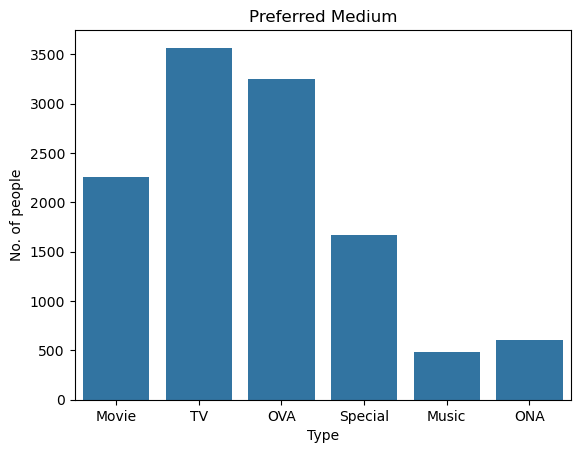

In [23]:
types=df_cleaned.type.unique()
freq=[]
for i in types:
    count=0
    for j in range(1,df_cleaned.shape[0]):
        if(df_cleaned.iloc[j,3]==i):
            count+=1
    freq.append(count)
sns.barplot(x=types, y=freq)
plt.xlabel('Type') 
plt.ylabel('No. of people')
plt.title('Preferred Medium')

Explore viewer preferences for series length.

In [24]:
epi=df_cleaned.episodes.unique()
epi.shape[0]

186

As observed, there are numerous unique values. To enhance visualization, we'll conduct binning. Binning is a technique where you group continuous data into intervals or "bins" to simplify the analysis.


Steps involved in Binning:

1.Sort the data

2.Determine the Number of Bins

3.Choose Bin Edges

4.Assign Labels

5.Perform Binning

In [25]:
#Sort the data
sorted_epi=sorted(epi)

#Determine the number of bins: Using Square Root Rule
num_bins = int(np.sqrt(len(sorted_epi)))
print("No. of bins:",num_bins)

#Choose bin edges: Using Equal Width Binning
bin_width = (max(sorted_epi) - min(sorted_epi)) / num_bins
bin_edges = np.arange(min(sorted_epi), max(sorted_epi) + bin_width, bin_width).round().astype(int)
print("Bin Width:",bin_width)
print("Bin Edges:",bin_edges)

#Assign labels
bin_labels = [f'Bin {i}' for i in range(1, len(bin_edges))]
print("Bin Labels:",bin_labels)

#Perform Binning
binned_data = pd.cut(sorted_epi, bins=bin_edges, labels=bin_labels, include_lowest=True)
df_epi_bin = pd.DataFrame({'Original Data': sorted_epi, 'Binned Data': binned_data})

No. of bins: 13
Bin Width: 139.76923076923077
Bin Edges: [   1  141  281  420  560  700  840  979 1119 1259 1399 1538 1678 1818]
Bin Labels: ['Bin 1', 'Bin 2', 'Bin 3', 'Bin 4', 'Bin 5', 'Bin 6', 'Bin 7', 'Bin 8', 'Bin 9', 'Bin 10', 'Bin 11', 'Bin 12', 'Bin 13']


In [26]:
df_epi_bin

,Original Data,Binned Data
0,1,Bin 1
1,2,Bin 1
2,3,Bin 1
3,4,Bin 1
4,5,Bin 1
...,...,...
181,1428,Bin 11
182,1471,Bin 11
183,1565,Bin 12
184,1787,Bin 13


Now Let's Visualise this

C:\Users\Admin\AppData\Local\Temp\ipykernel_10500\1657206783.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Binned Data', data=df_epi_bin, palette='viridis')


Text(0.5, 1.0, 'Viewer Preferences for Series length')

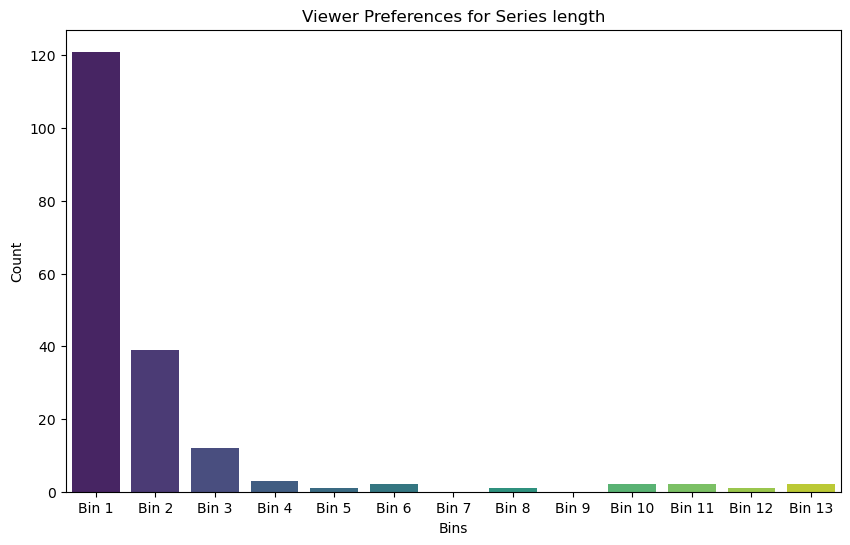

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Binned Data', data=df_epi_bin, palette='viridis')
plt.xlabel('Bins')
plt.ylabel('Count')
plt.title('Viewer Preferences for Series length')

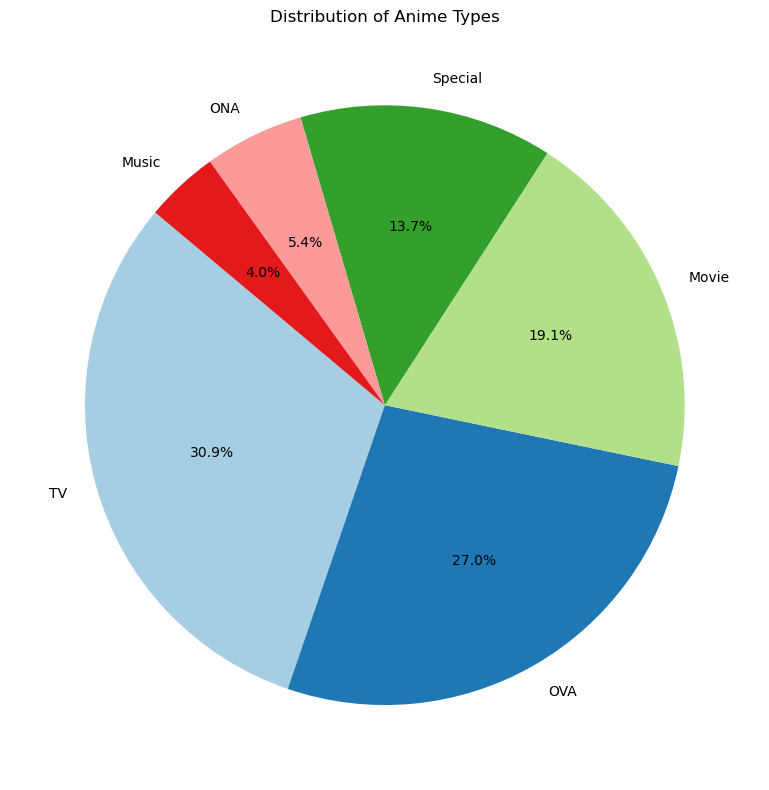

In [28]:
# Load dataset
anime = pd.read_csv("C:/Users/Admin/Downloads/Anime Recommendation Project/Datasets/Anime.csv")

# Count anime types
type_counts = anime['type'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Anime Types')
plt.tight_layout()
plt.show()

This indicates a prevalent preference for shorter series, particularly those with 1-141 episodes, as opposed to longer ones. The majority of viewers tend to avoid series with a higher episode count. Completing series with over 500 episodes appears to be a rarity, with only a very small number of individuals accomplishing this feat.

Examine the potential relationship between the number of episodes and ratings

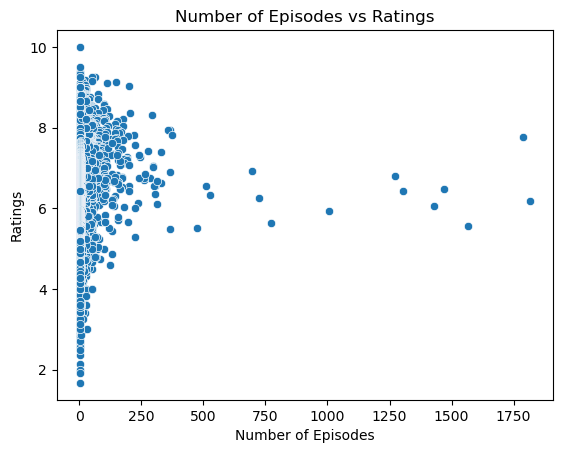

In [30]:

sns.scatterplot(x=df_cleaned['episodes'], y=df_cleaned['rating'])
plt.xlabel('Number of Episodes')
plt.ylabel('Ratings')
plt.title('Number of Episodes vs Ratings')
plt.show()

Highest-rated anime genres

In [31]:
df_g=df_cleaned
df_g['genres'] = df_g['genre'].str.split(', ')

C:\Users\Admin\AppData\Local\Temp\ipykernel_10500\460795529.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_g['genres'] = df_g['genre'].str.split(', ')


In [32]:
df_g

,anime_id,name,genre,type,episodes,rating,members,genres
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,"[Drama, Romance, School, Supernatural]"
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,"[Action, Adventure, Drama, Fantasy, Magic, Mil..."
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,"[Action, Comedy, Historical, Parody, Samurai, ..."
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,"[Sci-Fi, Thriller]"
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,"[Action, Comedy, Historical, Parody, Samurai, ..."
...,...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211,[Hentai]
12290,5543,Under World,Hentai,OVA,1,4.28,183,[Hentai]
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219,[Hentai]
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,[Hentai]


In [33]:
#Use the explode function to duplicate rows for each genre.
dfg_exploded = df_g.explode('genres')
dfg_exploded

,anime_id,name,genre,type,episodes,rating,members,genres
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,Drama
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,Romance
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,School
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,Supernatural
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,Action
...,...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211,Hentai
12290,5543,Under World,Hentai,OVA,1,4.28,183,Hentai
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219,Hentai
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,Hentai


In [34]:
#Group the data by genre and calculate the average rating for each genre.
genre_ratings = dfg_exploded.groupby('genres')['rating'].mean().sort_values(ascending=False)
genre_ratings

genres
Josei            7.443077
Thriller         7.382326
Mystery          7.233880
Police           7.116237
Shounen          7.055848
Psychological    7.010398
Military         7.006193
Supernatural     7.004340
Romance          6.999554
Shoujo Ai        6.978148
Drama            6.977465
School           6.976246
Harem            6.969712
Seinen           6.965472
Shounen Ai       6.961613
Super Power      6.906831
Shoujo           6.888194
Vampire          6.884600
Samurai          6.858621
Magic            6.811429
Martial Arts     6.804380
Game             6.795235
Action           6.787802
Sports           6.784080
Historical       6.753062
Slice of Life    6.747127
Adventure        6.746502
Sci-Fi           6.703891
Space            6.687766
Fantasy          6.678013
Demons           6.676307
Ecchi            6.664944
Mecha            6.645340
Comedy           6.639694
Parody           6.498892
Cars             6.461127
Horror           6.438194
Yaoi             6.432973
Henta

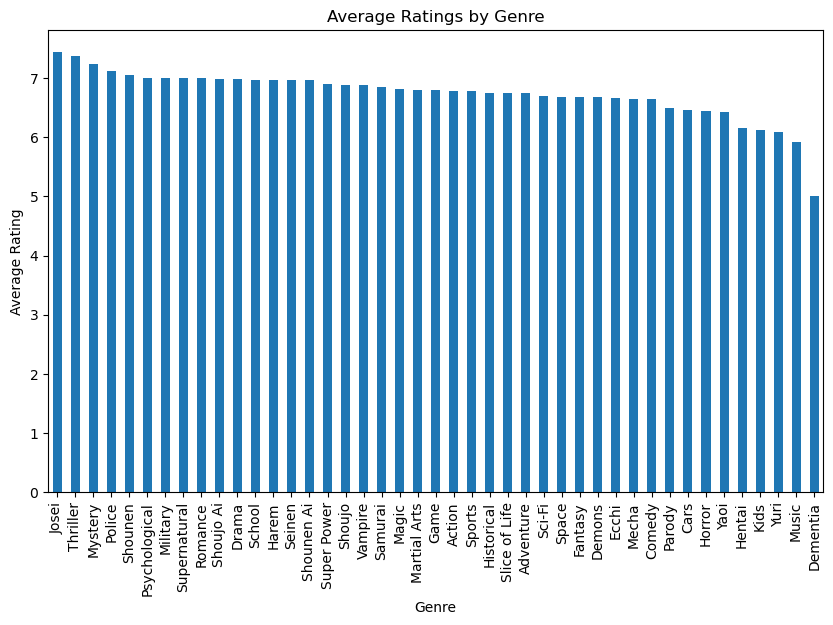

In [35]:
#Now visulise the results 
genre_ratings.plot(kind='bar', figsize=(10, 6))
plt.title('Average Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.show()

Upon observation, it becomes evident that the genre 'Josei' has the highest rating, closely followed by 'Thriller.' However, it's worth noting that the difference in ratings is relatively small

In [36]:
highest_rated_anime = dfg_exploded.loc[dfg_exploded.groupby('genres')['rating'].idxmax()]
print("Highest Rated Anime for Each Genre:")
print(highest_rated_anime[['name', 'genres', 'rating']])

Highest Rated Anime for Each Genre:
                                                    name     genres  rating
1                       Fullmetal Alchemist: Brotherhood     Action    9.26
1                       Fullmetal Alchemist: Brotherhood  Adventure    9.26
1                       Fullmetal Alchemist: Brotherhood      Drama    9.26
1                       Fullmetal Alchemist: Brotherhood    Fantasy    9.26
1                       Fullmetal Alchemist: Brotherhood      Magic    9.26
...                                                  ...        ...     ...
11118                                       Fuyu no Semi    Samurai    7.74
11118                                       Fuyu no Semi       Yaoi    7.74
11138  Sono Hanabira ni Kuchizuke wo: Anata to Koibit...     Hentai    7.40
11138  Sono Hanabira ni Kuchizuke wo: Anata to Koibit...     School    7.40
11138  Sono Hanabira ni Kuchizuke wo: Anata to Koibit...       Yuri    7.40

[204 rows x 3 columns]


# CONCLUSION 


With this I conclude this notebook. We were able to explore and analyse the following things in detail:

1.Determine the highest-rated anime genres

2.Understand audience preferences for different mediums (TV, Movie, OVA, etc.)

3.Explore whether viewers favor longer or shorter series

4.Examine the potential relationship between the number of episodes and ratings